In [ ]:
import pyshark

cap = pyshark.FileCapture('../data/pre_process/trace_clean/benign.pcap')
for packet in cap :
    if "HTTP2" in packet:
        print(packet._all_fields)
        break

c:\Users\thoger\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyshark\capture\capture.py:177: UserWarning: The running eventloop has tasks but pyshark must set a new eventloop to continue. Existing tasks may not run.
  warnings.warn("The running eventloop has tasks but pyshark must set a new eventloop to continue. "


RuntimeError: Cannot run the event loop while another loop is running

In [10]:
import json

with open("../data/pre_process/trace_dissection/benign.json") as f:
    e = json.load(f)

absent_count = 0
for node in e:
    if "is_attack" not in node["common"]: absent_count += 1

absent_count

0

3500 (avec id) vs 320 (sans id)

In [6]:
import pandas as pd

stat_prev_df = pd.read_csv('./stat/benign_original (1).csv')

In [ ]:
stat_prev_df = stat_prev_df[stat_prev_df["filename"] != "benign_original (6).pcap"]

In [8]:
stat_prev_df["filename"].unique()

array(['benign_original (1).pcap'], dtype=object)

In [14]:
stat_prev_df

filename            ts      id         ip_src  \
0       benign_original (1).pcap  1.751834e+09       4  10.100.200.14   
1       benign_original (1).pcap  1.751834e+09       5  10.100.200.16   
2       benign_original (1).pcap  1.751834e+09       6   10.100.200.4   
3       benign_original (1).pcap  1.751834e+09       7  10.100.200.16   
4       benign_original (1).pcap  1.751834e+09       8  10.100.200.16   
...                          ...           ...     ...            ...   
673804  benign_original (1).pcap  1.751839e+09  684033   10.100.200.4   
673805  benign_original (1).pcap  1.751839e+09  684034   10.100.200.8   
673806  benign_original (1).pcap  1.751839e+09  684035   10.100.200.4   
673807  benign_original (1).pcap  1.751839e+09  684036   10.100.200.8   
673808  benign_original (1).pcap  1.751839e+09  684037   10.100.200.8   

               ip_dst  is_attack  http2   pfcp    gtp   ngap    nas  \
0       10.100.200.16          0  False  False  False   True  False   
1        10.100.200.4          0  False  False  False  False  False   
2       10.100.200.16          0  False  False  False  False  False   
3        10.100.200.4          0  False  False  False  False  False   
4        10.100.200.4          0   True  False  False  False  False   
...               ...        ...    ...    ...    ...    ...    ...   
673804   10.100.200.8          0   True  False  False  False  False   
673805   10.100.200.4          0  False  False  False  False  False   
673806   10.100.200.8          0   True  False  False  False  False   
673807  10.100.200.13          0   True  False  False  False  False   
673808  10.100.200.13          0   True  False  False  False  False   

                      type  
0       register_random_ue  
1       register_random_ue  
2       register_random_ue  
3       register_random_ue  
4       register_random_ue  
...                    ...  
673804        user_traffic  
673805        user_traffic  
673806        user_traffic  
673807        user_traffic  
673808        user_traffic  

[673809 rows x 12 columns]

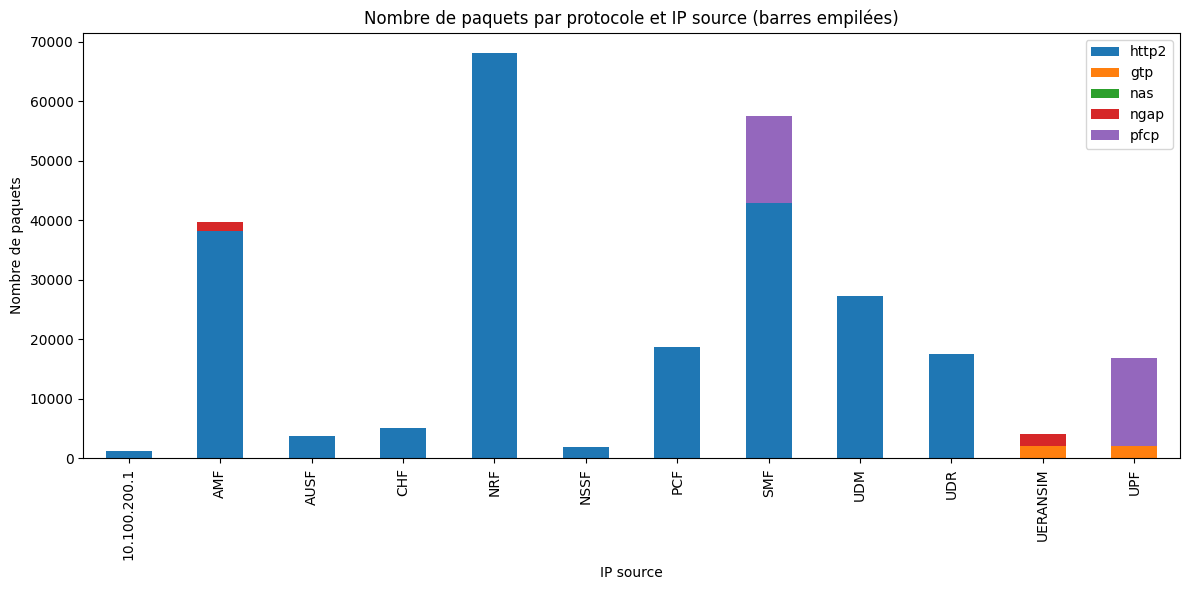

In [17]:
import matplotlib.pyplot as plt
import yaml

with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

stat_prev_df["ip_src"] = stat_prev_df["ip_src"].map(addr_dict).fillna(stat_prev_df["ip_src"])
stat_prev_df["ip_dst"] = stat_prev_df["ip_dst"].map(addr_dict).fillna(stat_prev_df["ip_dst"])

protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']
grouped = stat_prev_df.groupby('ip_src')[protocols].sum()

filtered = grouped[(grouped[protocols] != 0).any(axis=1)]
filtered.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Nombre de paquets')
plt.xlabel('IP source')
plt.title('Nombre de paquets par protocole et IP source (barres empilées)')
plt.tight_layout()
plt.show()


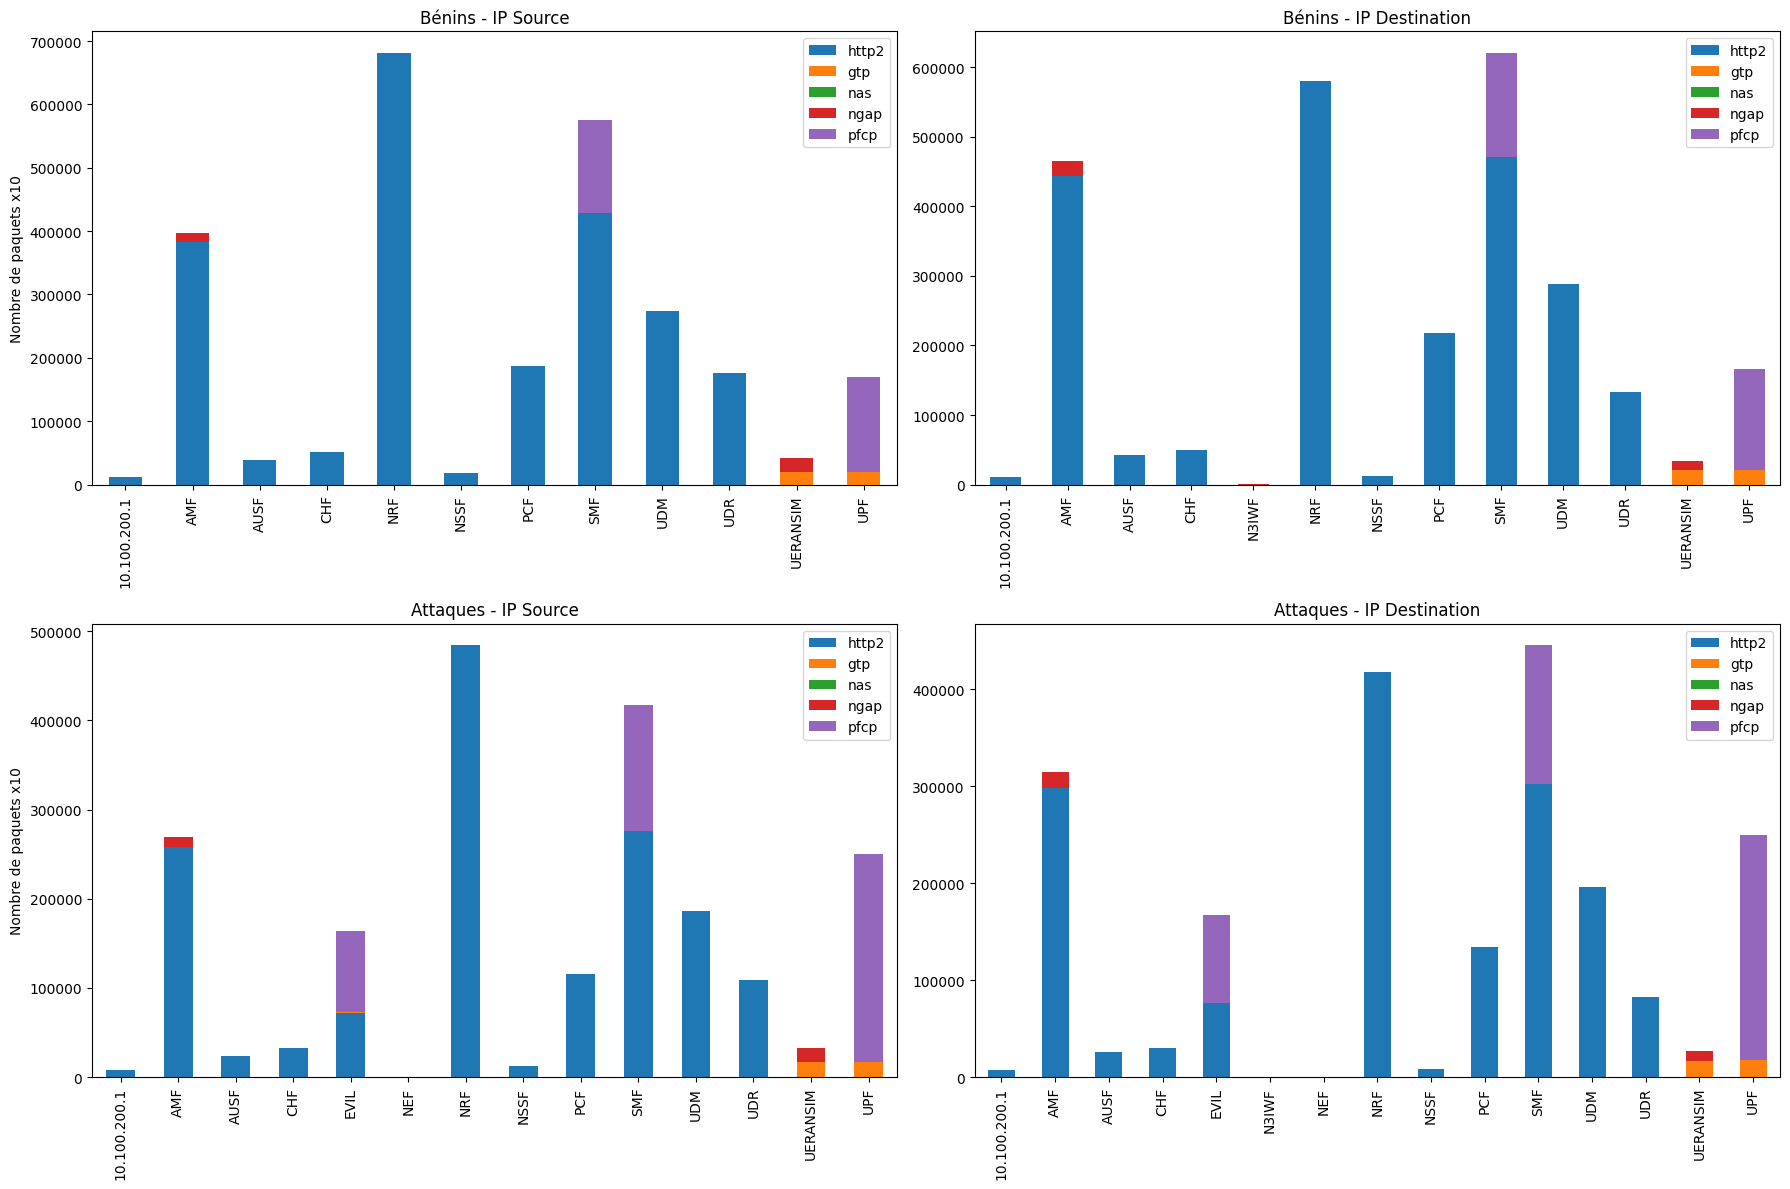

In [47]:
import matplotlib.pyplot as plt
import yaml
import pandas as pd

# Charger les CSV
benign_df = pd.read_csv('./stat/benign_original (1).csv')
attack_df = pd.read_csv('./stat/both_original (1).csv')

# Charger et inverser le dictionnaire YAML
with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

# Remplacer IP par nom
for df in [benign_df, attack_df]:
    df["ip_src"] = df["ip_src"].map(addr_dict).fillna(df["ip_src"])
    df["ip_dst"] = df["ip_dst"].map(addr_dict).fillna(df["ip_dst"])

protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']

# Fonction pour grouper et multiplier par 10
def prepare_grouped(df, column):
    grouped = df.groupby(column)[protocols].sum() * 10
    filtered = grouped[(grouped[protocols] != 0).any(axis=1)]
    return filtered

# Préparer les 4 tableaux
benign_src = prepare_grouped(benign_df, "ip_src")
benign_dst = prepare_grouped(benign_df, "ip_dst")
attack_src = prepare_grouped(attack_df, "ip_src")
attack_dst = prepare_grouped(attack_df, "ip_dst")

# Créer la figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top-left : ip_src benign
benign_src.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title("Bénins - IP Source")
axes[0, 0].set_ylabel("Nombre de paquets x10")
axes[0, 0].set_xlabel("")

# Top-right : ip_dst benign
benign_dst.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title("Bénins - IP Destination")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")

# Bottom-left : ip_src attaques
attack_src.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title("Attaques - IP Source")
axes[1, 0].set_ylabel("Nombre de paquets x10")
axes[1, 0].set_xlabel("")

# Bottom-right : ip_dst attaques
attack_dst.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title("Attaques - IP Destination")
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("")

plt.tight_layout()
plt.show()


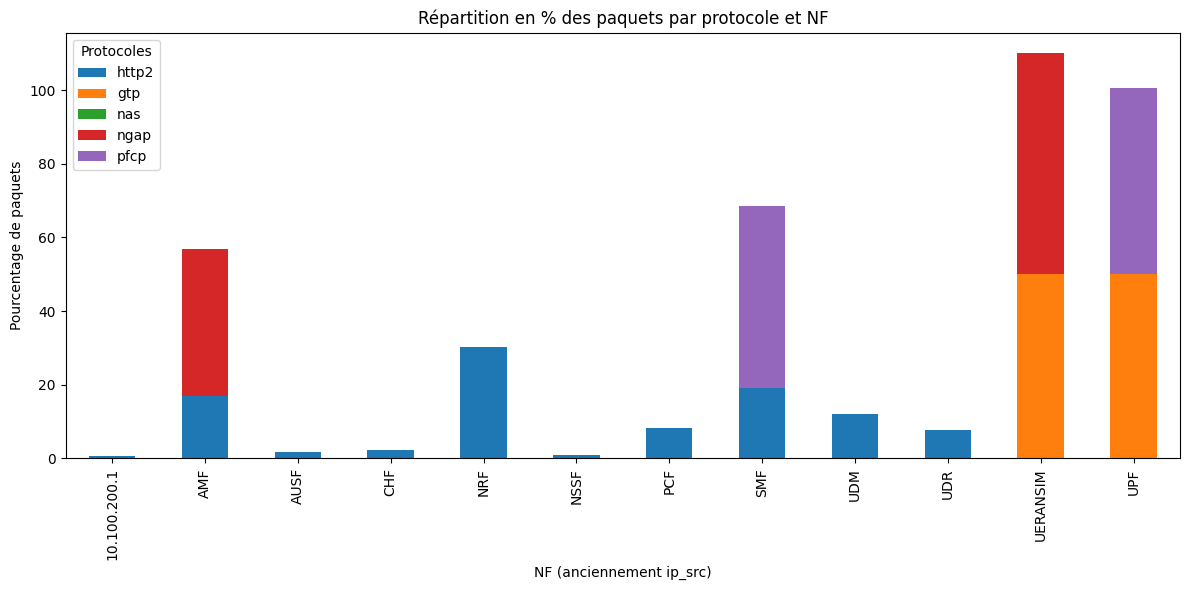

In [18]:
import matplotlib.pyplot as plt
import yaml

# Charger dictionnaire et inverser clé/valeur
with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

# Remplacer IP par nom
stat_prev_df["ip_src"] = stat_prev_df["ip_src"].map(addr_dict).fillna(stat_prev_df["ip_src"])
stat_prev_df["ip_dst"] = stat_prev_df["ip_dst"].map(addr_dict).fillna(stat_prev_df["ip_dst"])

# Protocoles
protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']

# Regrouper par ip_src et sommer
grouped = stat_prev_df.groupby('ip_src')[protocols].sum()

# Garder uniquement les NFs qui ont au moins 1 paquet
filtered = grouped[(grouped[protocols] != 0).any(axis=1)]

# Normaliser par protocole → colonnes = % de chaque protocole reçu par chaque ip_src
percentages = filtered.div(filtered.sum(axis=0), axis=1) * 100

# Tracer le graphique
percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Pourcentage de paquets')
plt.xlabel('NF (anciennement ip_src)')
plt.title('Répartition en % des paquets par protocole et NF')
plt.legend(title="Protocoles")
plt.tight_layout()
plt.show()


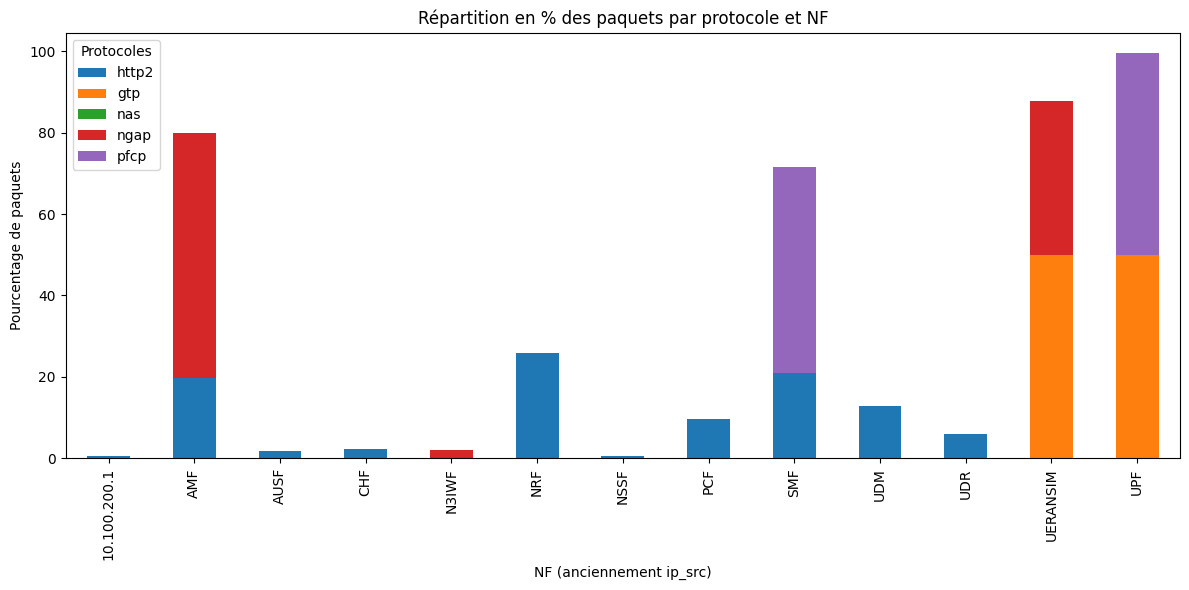

In [19]:
import matplotlib.pyplot as plt
import yaml

# Charger dictionnaire et inverser clé/valeur
with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

# Remplacer IP par nom
stat_prev_df["ip_src"] = stat_prev_df["ip_src"].map(addr_dict).fillna(stat_prev_df["ip_src"])
stat_prev_df["ip_dst"] = stat_prev_df["ip_dst"].map(addr_dict).fillna(stat_prev_df["ip_dst"])

# Protocoles
protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']

# Regrouper par ip_src et sommer
grouped = stat_prev_df.groupby('ip_dst')[protocols].sum()

# Garder uniquement les NFs qui ont au moins 1 paquet
filtered = grouped[(grouped[protocols] != 0).any(axis=1)]

# Normaliser par protocole → colonnes = % de chaque protocole reçu par chaque ip_src
percentages = filtered.div(filtered.sum(axis=0), axis=1) * 100

# Tracer le graphique
percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Pourcentage de paquets')
plt.xlabel('NF (anciennement ip_src)')
plt.title('Répartition en % des paquets par protocole et NF')
plt.legend(title="Protocoles")
plt.tight_layout()
plt.show()


In [32]:
grouped = stat_prev_df.groupby([pd.Grouper(key="datetime", freq="5s"), "type"])["packets"].count().reset_index()
print(grouped)

datetime             type              
2025-07-06 20:26:05  register_random_ue    2237
2025-07-06 20:26:10  register_random_ue     333
                     user_traffic            41
2025-07-06 20:26:15  user_traffic            32
2025-07-06 20:26:20  user_traffic            58
                                           ... 
2025-07-06 22:02:15  remove_random_nf        55
                     user_traffic           122
2025-07-06 22:02:20  user_traffic            90
2025-07-06 22:02:25  user_traffic           831
2025-07-06 22:02:30  user_traffic           109
Name: packets, Length: 1804, dtype: int64


C:\Users\thoger\AppData\Local\Temp\ipykernel_31548\1665528851.py:17: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  stat_prev_df.groupby([pd.Grouper(key="datetime", freq="5S"), "type"])["packets"]
C:\Users\thoger\AppData\Local\Temp\ipykernel_31548\1665528851.py:26: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_index = pd.date_range(df_pivot.index.min(), df_pivot.index.max(), freq="5S")


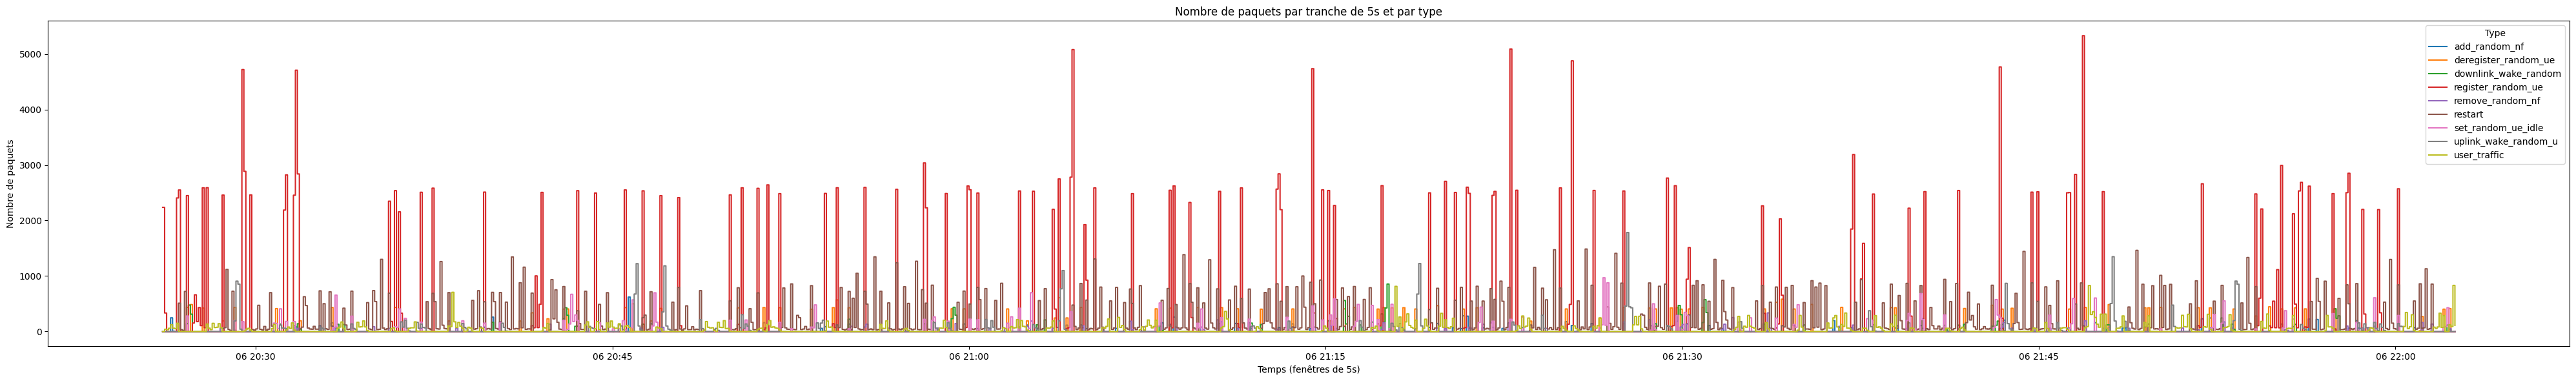

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir ts en datetime
stat_prev_df["ts"] = stat_prev_df["ts"].astype(float)
stat_prev_df["datetime"] = pd.to_datetime(stat_prev_df["ts"], unit="s")

# Trier
stat_prev_df = stat_prev_df.sort_values("ts")

# Calculer nombre de paquets via id
stat_prev_df["packets"] = stat_prev_df["id"].diff().fillna(1).astype(int)
stat_prev_df.loc[stat_prev_df["packets"] <= 0, "packets"] = 1

# Grouper par tranches de 5s et par type uniquement
df_grouped = (
    stat_prev_df.groupby([pd.Grouper(key="datetime", freq="5S"), "type"])["packets"]
    .count()
    .reset_index()
)

# Pivot pour avoir 1 colonne par type
df_pivot = df_grouped.pivot(index="datetime", columns="type", values="packets").fillna(0)

# Étendre l’axe temps pour avoir des 0 explicites quand pas de paquets
full_index = pd.date_range(df_pivot.index.min(), df_pivot.index.max(), freq="5S")
df_pivot = df_pivot.reindex(full_index, fill_value=0)

# Tracer
plt.figure(figsize=(40, 6))
for col in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[col], label=col, drawstyle="steps-post")

plt.xlabel("Temps (fenêtres de 5s)")
plt.ylabel("Nombre de paquets")
plt.title("Nombre de paquets par tranche de 5s et par type")
plt.legend(title="Type")
plt.tight_layout()
plt.show()


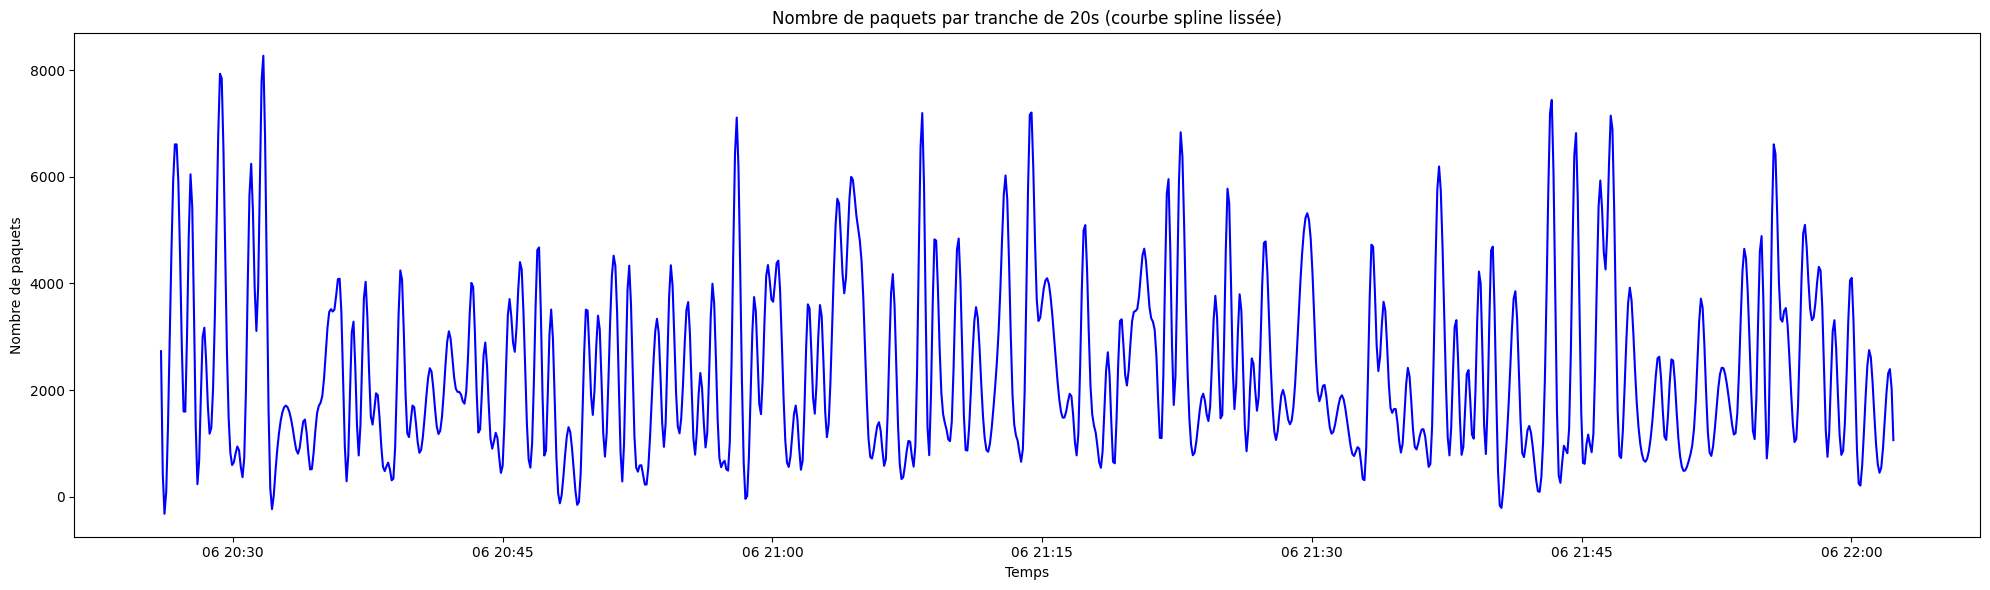

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

# Convertir ts en datetime
stat_prev_df["ts"] = stat_prev_df["ts"].astype(float)
stat_prev_df["datetime"] = pd.to_datetime(stat_prev_df["ts"], unit="s")

# Trier par temps
stat_prev_df = stat_prev_df.sort_values("ts")

# Calculer le nombre de paquets via l'id
stat_prev_df["packets"] = stat_prev_df["id"].diff().fillna(1).astype(int)
stat_prev_df.loc[stat_prev_df["packets"] <= 0, "packets"] = 1

# Grouper par tranches de 20 secondes (comme dans ton code)
df_grouped = stat_prev_df.groupby(pd.Grouper(key="datetime", freq="20s"))["packets"].sum().reset_index()

# Identifier les changements de type
stat_prev_df["type_change"] = stat_prev_df["type"] != stat_prev_df["type"].shift(1)
type_change_times = stat_prev_df.loc[stat_prev_df["type_change"], "datetime"].values

# === Création de la spline pour lisser la courbe ===
# Convertir les datetime en nombres pour l'interpolation
x = df_grouped["datetime"].map(pd.Timestamp.timestamp).values  # en secondes
y = df_grouped["packets"].values

# Créer un spline lisse (s paramètre de lissage)
spline = UnivariateSpline(x, y, s=0.5 * np.sum(y))  # ajuste s pour le degré de lissage

# Générer des points plus nombreux pour avoir une courbe continue
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Convertir les timestamps lissés en datetime pour matplotlib
x_smooth_datetime = pd.to_datetime(x_smooth, unit='s')

# Tracer
plt.figure(figsize=(20, 6))
plt.plot(x_smooth_datetime, y_smooth, label="Paquets lissés", color="blue")

plt.xlabel("Temps")
plt.ylabel("Nombre de paquets")
plt.title("Nombre de paquets par tranche de 20s (courbe spline lissée)")
plt.tight_layout()
plt.show()


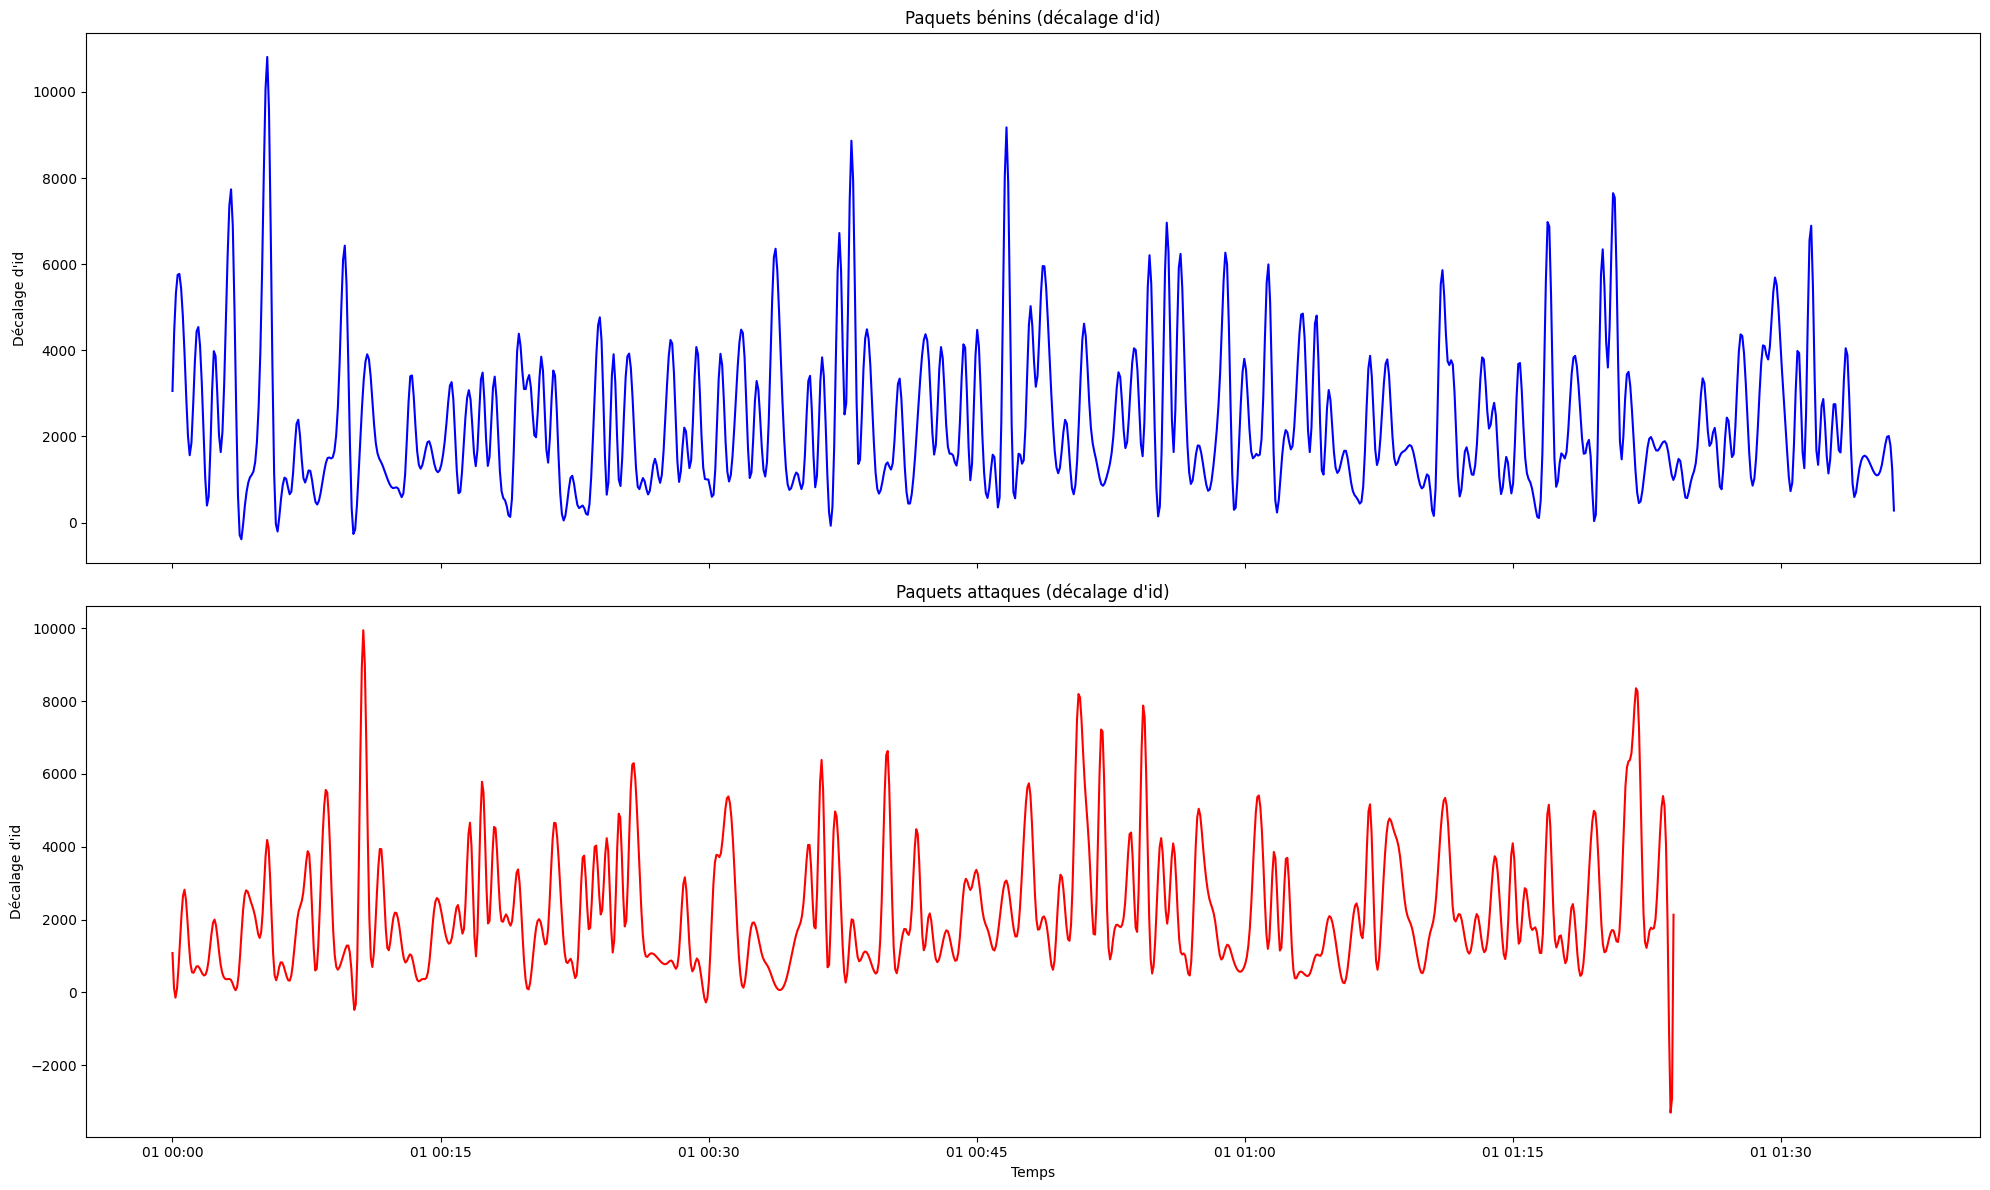

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

# --- Données bénignes ---
benign_df = pd.read_csv('./stat/benign_original (1).csv')
benign_df["ts"] = benign_df["ts"].astype(float)
benign_df["datetime"] = pd.to_datetime(benign_df["ts"], unit="s")

# Décalage d'id (nombre de paquets entre deux lignes)
benign_df["delta"] = pd.to_timedelta(benign_df["ts"] - benign_df["ts"].min(), unit='s')

# Grouper par tranche de 20s et sommer les deltas
benign_df["packets"] = benign_df["id"].diff().fillna(1).astype(int)
benign_grouped = benign_df.groupby(pd.Grouper(key="delta", freq="20s"))["packets"].sum().reset_index()

# --- Données attaques ---
attack_df = pd.read_csv('./stat/both_original (1).csv')
attack_df["ts"] = attack_df["ts"].astype(float)
attack_df["datetime"] = pd.to_datetime(attack_df["ts"], unit="s")

attack_df["delta"] = pd.to_timedelta(attack_df["ts"] - attack_df["ts"].min(), unit='s')
attack_df["packets"] = attack_df["id"].diff().fillna(1).astype(int)
attack_grouped = attack_df.groupby(pd.Grouper(key="delta", freq="20s"))["packets"].sum().reset_index()

# --- Spline pour lisser la courbe ---
x_b = benign_grouped["delta"].dt.total_seconds().values
y_b = benign_grouped["packets"].values
spline_b = UnivariateSpline(x_b, y_b, s=0.5 * np.sum(y_b))
x_smooth_b = np.linspace(x_b.min(), x_b.max(), 1000)
y_smooth_b = spline_b(x_smooth_b)
x_smooth_b_dt = pd.to_datetime(x_smooth_b, unit='s')

x_a = attack_grouped["delta"].dt.total_seconds().values
y_a = attack_grouped["packets"].values
spline_a = UnivariateSpline(x_a, y_a, s=0.5 * np.sum(y_a))
x_smooth_a = np.linspace(x_a.min(), x_a.max(), 1000)
y_smooth_a = spline_a(x_smooth_a)
x_smooth_a_dt = pd.to_datetime(x_smooth_a, unit='s')

# --- Tracé ---
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

axes[0].plot(x_smooth_b_dt, y_smooth_b, color="blue", label="Décalage bénins")
axes[0].set_ylabel("Décalage d'id")
axes[0].set_title("Paquets bénins (décalage d'id)")

axes[1].plot(x_smooth_a_dt, y_smooth_a, color="red", label="Décalage attaques")
axes[1].set_xlabel("Temps")
axes[1].set_ylabel("Décalage d'id")
axes[1].set_title("Paquets attaques (décalage d'id)")

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd

# Exemple : DataFrame avec une colonne timestamp
df = pd.DataFrame({
    "timestamp": [1751833569.357074, 1751833570.123456, 1751833580.987654]
})

# Convertir en datetime si nécessaire
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Recalculer comme décalage par rapport au minimum
df["delta_time"] = df["timestamp"] - df["timestamp"].min()

# Si tu veux en secondes (float)
df["delta_seconds"] = df["delta_time"].dt.total_seconds()

print(df)


                      timestamp                delta_time  delta_seconds
0 2025-07-06 20:26:09.357074022           0 days 00:00:00       0.000000
1 2025-07-06 20:26:10.123456001 0 days 00:00:00.766381979       0.766382
2 2025-07-06 20:26:20.987653971 0 days 00:00:11.630579949      11.630580


In [65]:
import re

import networkx as nx
import numpy as np
import torch
import torch.nn.functional as F
import tqdm
from sklearn.mixture import GaussianMixture
import random

N_COMPONENTS = 17 # TEMPORAIRE, à déterminer

def init_gmm(float_encountered: list[float]):
    global gmm  # noqa: PLW0603
    gmm = GaussianMixture(n_components=N_COMPONENTS)
    data = np.array(float_encountered).reshape(-1,1)
    gmm.fit(data)

random_floats = [random.uniform(0, 10) for _ in range(100)]
init_gmm(random_floats)

label_to_array = np.array([[5.0]])
prediction     = gmm.predict(label_to_array)
print(random_floats)
prediction

[0.31173799891363707, 8.501380974149313, 8.817082243563544, 3.6055123757246967, 1.9796369515811074, 4.009321700001241, 5.3800621397152915, 9.24797789973704, 3.6818535427297263, 9.945920401894346, 0.49994658472847564, 1.8051546819048303, 7.149180806350879, 3.6333658441627668, 4.82129961915093, 2.2391401885433226, 4.712179606621184, 9.3214209840783, 7.136943383738616, 6.276996732632666, 1.0749938965095385, 9.867629582243222, 4.2248674158319846, 2.9227846202864805, 6.684944468999081, 4.886833927912048, 5.466541480670067, 5.784036524000263, 1.449226346778657, 0.06850698438129466, 3.5641326438905105, 3.565298694924106, 3.5155243353906283, 7.265954563913213, 9.3020852047443, 9.623808844690696, 7.825606729249497, 5.9911206575943785, 1.7250346032289388, 5.951216396350202, 8.503883076242607, 4.977277380626909, 0.5278870897909405, 8.017155137011141, 9.976394334393383, 8.020078008356654, 9.55970929622246, 9.609472197525013, 9.93202825113196, 0.4680197442202372, 2.0246438626113905, 8.0424157810971

array([4], dtype=int64)

In [25]:
prediction

array([2], dtype=int64)

In [ ]:
import torch

# Convert GMM prediction to one-hot encoding
one_hot_tensor = torch.zeros(N_COMPONENTS, dtype=torch.int)
one_hot_tensor[prediction[0]] = 1
print(one_hot_tensor)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [24]:
list(range(1,18))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [1]:
import pickle

with open('../data/pre_process/graph_construction/benign.pkl', 'rb') as f:
    graphs = pickle.load(f)
print(graphs)

Graph with 1951 nodes and 7517 edges


In [8]:
a = [attr for n, attr in graphs.nodes(data=True) if "{" in attr.get("label")]
a

[{'label': "{'per.extension_bit': 'False', 'per.choice_index': 0, 'NGAP_PDU': 0, 'initiatingMessage_element': 'initiatingMessage', 'procedureCode': 10, 'per.enum_index': 0, 'criticality': 0, 'per.open_type_length': 10, 'value_element': 'value', 'UEContextReleaseRequest_element': 'UEContextReleaseRequest', 'per.sequence_of_length': 10, 'protocolIEs': 10, 'ProtocolIE_Field_element': 'ProtocolIE-Field', 'id': 10, 'AMF_UE_NGAP_ID': 6, 'RAN_UE_NGAP_ID': 6, 'PDUSessionResourceListCxtRelReq': 0, 'PDUSessionResourceItemCxtRelReq_element': 'PDUSessionResourceItemCxtRelReq', 'per.optional_field_bit': 'False', 'pDUSessionID': 0, 'Cause': 0, 'per.extension_present_bit': 'False', 'radioNetwork': 0}",
  'node_type': 2,
  'packet_id': 0},
 {'label': "{'method': 'POST', 'path': '/oauth2/token', 'stream_id': 0}",
  'node_type': 2,
  'packet_id': 1},
 {'label': "{'status': 7, 'stream_id': 0}", 'node_type': 2, 'packet_id': 2},
 {'label': "{'token_type': 'Bearer', 'expires_in': 5, 'scope': 'nsmf-pdusessio

In [3]:
# Trouver les noeuds avec label == 0
nodes_with_label_0 = [n for n, attr in graphs.nodes(data=True) if attr.get("label") == "0"]

# Trouver les arcs liés à ces noeuds
edges_linked = [
    (u, v, d) for u, v, d in graphs.edges(data=True)
    if u in nodes_with_label_0 or v in nodes_with_label_0
]

print("Noeuds avec label 0 :", nodes_with_label_0)
print("Arcs liés :", edges_linked)

Noeuds avec label 0 : [19]
Arcs liés : [(18, 19, {'label': 'http2[0].ngApCause.value'}), (19, 34, {'label': 'http2[0].ngApCause.value'}), (19, 48, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 126, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 167, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 184, {'label': 'http2[0].multipleUnitUsage[0].usedUnitContainer[0].localSequenceNumber'}), (19, 187, {'label': 'http2[0].invocationSequenceNumber'}), (19, 404, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 675, {'label': 'http2[0].invocationSequenceNumber'}), (19, 677, {'label': 'http2[0].invocationSequenceNumber'}), (19, 854, {'label': 'http2[0].multipleUnitUsage[0].usedUnitContainer[0].localSequenceNumber'})]


In [6]:
unique_labels = set()
for _, _, edge_data in graphs[0].edges(data=True):
    if "label" in edge_data:
        unique_labels.add(edge_data["label"])
unique_labels = list(unique_labels)
print(unique_labels)

['http2[0].target-plmn-list[0].mcc', 'pfcp[0].pfcp.pdn_type', 'http2[0].pccRules.PccRuleId-1.precedence', 'ngap[0].ngap.sST', 'ngap[0].nas-5gs.spare_half_octet', 'ngap[0].ngap.qosFlowLevelQosParameters_element', 'http2[0].tai.plmnId.mnc', 'ngap[0].per.optional_field_bit', 'ngap[1].per.optional_field_bit', 'http2[0].jwt.exp', 'http2[0].individualSmSubsData[0].dnnConfigurations.internet.sessionAmbr.downlink', 'http2[0].plmn-id.mcc', 'http2[0].pDUSessionChargingInformation.pduSessionInformation.networkSlicingInfo.sNSSAI.sd', 'http2[0].singleNssai.sd', 'pfcp[0].pfcp.dl_mbr', 'http2[0].upCnxState', 'http2[0].policyCtrlReqTriggers[7]', 'http2[0].nfInstances[1].nfServices[4].nfServiceStatus', 'http2[0].tai.plmnId.mcc', 'ngap[0].ngap.fiveG_TMSI', 'http2[0].method', 'ngap[0].nas-5gs.seq_no', 'http2[0].pccRules.PccRuleId-1.flowInfos[0].flowDirection', 'http2[0].policyCtrlReqTriggers[5]', 'http2[0].invocationTimeStamp', 'ngap[0].nas-5gs.security_header_type', 'http2[0].notificationUri', 'http2[0]

In [21]:
from torch_geometric.utils import from_networkx
data = from_networkx(graphs[0], group_node_attrs=["embedding"], group_edge_attrs=["embedding"])


ValueError: Not all nodes contain the same attributes

In [ ]:
data

In [7]:
max_packet_id = max(nx.get_node_attributes(graph, "packet_id").values())

subgraph_count = (max_packet_id - 500) // 1000 + 1

subgraphs = []

for i in range(subgraph_count):

    # Get the nodes within the window
    selected_nodes = [
        node for node, attr in graph.nodes(data=True)
        if i*500 <= attr["packet_id"] <= i*500 + 1000
    ]
    subgraph = graph.subgraph(selected_nodes)
    print(subgraph)

Graph with 1554 nodes and 7268 edges


In [2]:
import hashlib
import numpy as np

D = 512
for token in ["toto","titi","toto"]:
    seed = int.from_bytes(hashlib.sha256(token.encode('utf8')).digest()[:8], 'big') % (2**32)
    rng = np.random.RandomState(seed)
    print(token,seed,rng)
    print(rng.randn(D).astype(np.float32)[:3])


toto 827688620 RandomState(MT19937)
[-0.06007909 -0.7802831   0.5533297 ]
titi 3032597917 RandomState(MT19937)
[ 1.5279652  0.2223371 -1.4584956]
toto 827688620 RandomState(MT19937)
[-0.06007909 -0.7802831   0.5533297 ]


In [9]:
graph[0]

AtlasView({1: {'label': 'ip_src'}, 2: {'label': 'ip_dst'}, 3: {'label': 'ngap[0].per.extension_present_bit'}, 4: {'label': 'ngap[0].ngap.radioNetwork'}, 5: {'label': 'ngap[0].ngap.initiatingMessage_element'}, 6: {'label': 'ngap[0].ngap.procedureCode'}, 7: {'label': 'ngap[0].ngap.pDUSessionID'}, 8: {'label': 'ngap[0].per.open_type_length'}, 9: {'label': 'ngap[0].ngap.value_element'}, 10: {'label': 'ngap[0].ngap.UEContextReleaseRequest_element'}, 11: {'label': 'ngap[0].ngap.protocolIEs'}, 12: {'label': 'ngap[0].ngap.ProtocolIE_Field_element'}, 13: {'label': 'ngap[0].ngap.id'}, 14: {'label': 'ngap[0].ngap.RAN_UE_NGAP_ID'}, 15: {'label': 'ngap[0].ngap.PDUSessionResourceListCxtRelReq'}, 16: {'label': 'ngap[0].ngap.PDUSessionResourceItemCxtRelReq_element'}})

In [1]:
import json

with open("../data/pre_process/dissection_clean/benign.json") as f:
    my_json = json.load(f)

total_dict = {
    '0' : [],
    '1' : [],
}

for dissected_pkt in my_json:

    if "http2" in dissected_pkt["protocols"] and "stream_id" in dissected_pkt["protocols"]["http2"]:
        stream_id = dissected_pkt["protocols"]["http2"].pop("stream_id")
        stream_response = dissected_pkt["protocols"]["http2"].pop("stream_response")

    is_attack = dissected_pkt["common"].pop("is_attack")
    attack_type = dissected_pkt["common"].pop("type")

    packet_dict = dissected_pkt["common"].copy()
    for protocols in dissected_pkt["protocols"].values():
        for layer in protocols:
            packet_dict.update(layer)

    total_dict[is_attack].append(packet_dict)

total_dict

{'0': [{'ip_src': '10.100.200.14',
   'ip_dst': '10.100.200.16',
   'per.extension_bit': 'False',
   'per.choice_index': '0',
   'NGAP_PDU': '0',
   'initiatingMessage_element': 'initiatingMessage',
   'procedureCode': '42',
   'per.enum_index': '1',
   'criticality': '1',
   'per.open_type_length': '32',
   'value_element': 'value',
   'UEContextReleaseRequest_element': 'UEContextReleaseRequest',
   'per.sequence_of_length': '4',
   'protocolIEs': '4',
   'ProtocolIE_Field_element': 'ProtocolIE-Field',
   'id': '10',
   'AMF_UE_NGAP_ID': '1682',
   'RAN_UE_NGAP_ID': '1682',
   'PDUSessionResourceListCxtRelReq': '2',
   'PDUSessionResourceItemCxtRelReq_element': 'PDUSessionResourceItemCxtRelReq',
   'per.optional_field_bit': 'False',
   'pDUSessionID': '1',
   'Cause': '0',
   'per.extension_present_bit': 'False',
   'radioNetwork': '0'},
  {'ip_src': '10.100.200.16',
   'ip_dst': '10.100.200.4',
   'method': 'POST',
   'path': '/oauth2/token',
   'stream_id': 1},
  {'ip_src': '10.100.

c:\Users\thoger\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\thoger\AppData\Local\Temp\ipykernel_12964\3041737935.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_benin["packet_id"], y=df_benin["mean_jaccard_dist"], palette="viridis")
C:\Users\thoger\AppData\Local\Temp\ipykernel_12964\3041737935.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_attack["packet_id"], y=df_attack["mean_jaccard_dist"], palette="rocket")


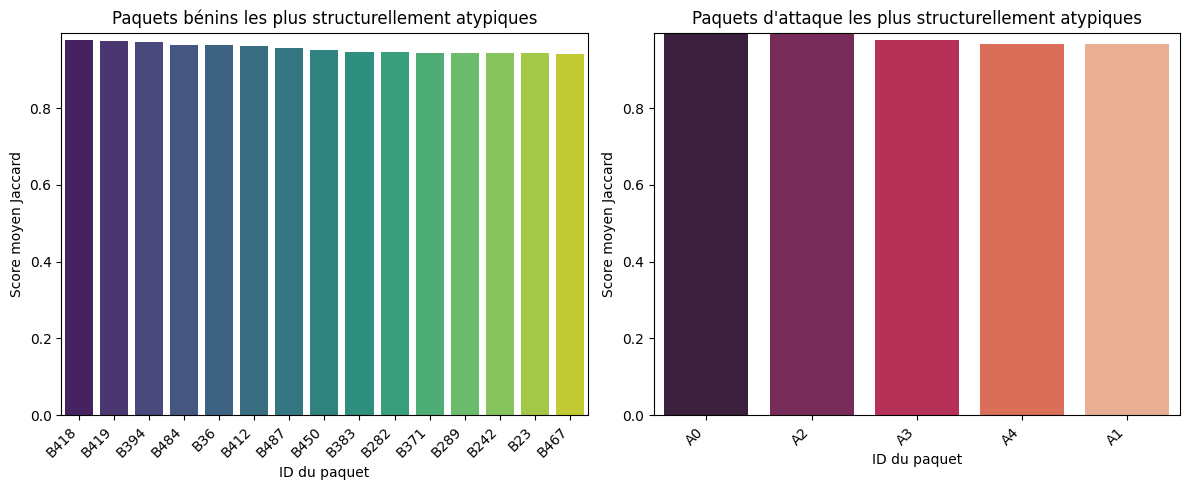


📊 Top paquets atypiques (structurellement différents) :
    packet_id  is_attack  mean_jaccard_dist
500        A0          1           0.995842
502        A2          1           0.995488
503        A3          1           0.978066
418      B418          0           0.977477
419      B419          0           0.975814
394      B394          0           0.971917
504        A4          1           0.967463
501        A1          1           0.965806
484      B484          0           0.964086
36        B36          0           0.963549
412      B412          0           0.962784
487      B487          0           0.955578
450      B450          0           0.951011
383      B383          0           0.946697
282      B282          0           0.946392
371      B371          0           0.944144
289      B289          0           0.944144
242      B242          0           0.944144
23        B23          0           0.942080
467      B467          0           0.941230


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# =============================
# 🧩 Données simulées
# =============================
benin_data = total_dict['0'][:500]

attaque_data = [
    {"ip", "user", "password", "authToken"},
    {"ip", "method", "length", "region", "hash"},
    {"ip", "user", "authToken", "agent"},
    {"ip", "method", "region", "instanceId", "hash"},
    {"ip", "method", "length", "region", "agent", "authToken"},
]

# IDs uniques pour tous les paquets
benin_ids = [f"B{i}" for i in range(len(benin_data))]
attaque_ids = [f"A{i}" for i in range(len(attaque_data))]

# Labels globaux
all_ids = benin_ids + attaque_ids
all_data = benin_data + attaque_data
is_attack = [0]*len(benin_data) + [1]*len(attaque_data)

# =============================
# 1️⃣ Matrice binaire
# =============================
all_keys = sorted({k for pkt in all_data for k in pkt})
X = pd.DataFrame([{k: int(k in pkt) for k in all_keys} for pkt in all_data])
X["is_attack"] = is_attack
X["packet_id"] = all_ids

# =============================
# 2️⃣ Calcul distance Jaccard
# =============================
distances = pairwise_distances(X[all_keys].values, metric="jaccard")
X["mean_jaccard_dist"] = distances.mean(axis=1)

# =============================
# 3️⃣ Filtrage : top outliers
# =============================
# Par exemple, garder le top 20 paquets les plus “rares”
top_n = 20
df_top = X.sort_values(by="mean_jaccard_dist", ascending=False).head(top_n)

# Puis on sépare à nouveau en bénins et attaques
df_benin = df_top[df_top.is_attack == 0]
df_attack = df_top[df_top.is_attack == 1]

# =============================
# 4️⃣ Barplots côte à côte
# =============================
plt.figure(figsize=(12,5))

# Échelle commune
y_max = df_top["mean_jaccard_dist"].max()

# Bénins
plt.subplot(1,2,1)
sns.barplot(x=df_benin["packet_id"], y=df_benin["mean_jaccard_dist"], palette="viridis")
plt.title("Paquets bénins les plus structurellement atypiques")
plt.xlabel("ID du paquet")
plt.ylabel("Score moyen Jaccard")
plt.ylim(0, y_max)
plt.xticks(rotation=45, ha="right")

# Attaques
plt.subplot(1,2,2)
sns.barplot(x=df_attack["packet_id"], y=df_attack["mean_jaccard_dist"], palette="rocket")
plt.title("Paquets d'attaque les plus structurellement atypiques")
plt.xlabel("ID du paquet")
plt.ylabel("Score moyen Jaccard")
plt.ylim(0, y_max)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# =============================
# 5️⃣ Afficher les top paquets dans le terminal
# =============================
print("\n📊 Top paquets atypiques (structurellement différents) :")
print(df_top[["packet_id", "is_attack", "mean_jaccard_dist"]].head(top_n))


In [4]:
# Trouver l'index du paquet B418
target_id = "B418"
index = int(target_id[1:])  # retire le "B" pour récupérer l'index numérique

# Afficher le contenu réel du paquet
print(f"\n📦 Contenu du paquet {target_id} :")
print(benin_data[index])



📦 Contenu du paquet B418 :
{'ip_src': '10.100.200.4', 'ip_dst': '10.100.200.8', 'validityPeriod': 100, 'nfInstances[0].nfInstanceId': '5484afc3-5fc5-4901-bd2e-c3c7ff45c680', 'nfInstances[0].nfType': 'PCF', 'nfInstances[0].nfStatus': 'REGISTERED', 'nfInstances[0].plmnList[0].mcc': '208', 'nfInstances[0].plmnList[0].mnc': '93', 'nfInstances[0].ipv4Addresses[0]': 'pcf.free5gc.org', 'nfInstances[0].locality': 'area1', 'nfInstances[0].pcfInfo.dnnList[0]': 'free5gc', 'nfInstances[0].pcfInfo.dnnList[1]': 'internet', 'nfInstances[0].customInfo.oauth2': True, 'nfInstances[0].nfServices[0].serviceInstanceId': '0', 'nfInstances[0].nfServices[0].serviceName': 'npcf-am-policy-control', 'nfInstances[0].nfServices[0].versions[0].apiVersionInUri': 'v1', 'nfInstances[0].nfServices[0].versions[0].apiFullVersion': '1.0.2', 'nfInstances[0].nfServices[0].scheme': 'http', 'nfInstances[0].nfServices[0].nfServiceStatus': 'REGISTERED', 'nfInstances[0].nfServices[0].ipEndPoints[0].ipv4Address': 'pcf.free5gc.or

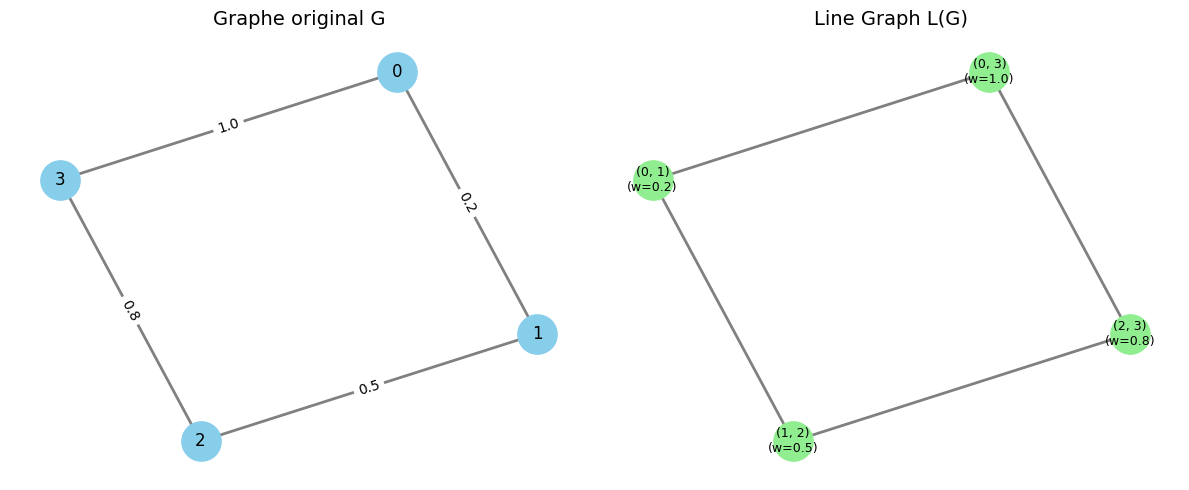

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1️⃣ Création du graphe original ---
G = nx.Graph()

# Ajouter des nœuds avec features
G.add_nodes_from([
    (0, {"feat": [1.0, 0.0]}),
    (1, {"feat": [0.5, 0.5]}),
    (2, {"feat": [0.0, 1.0]}),
    (3, {"feat": [1.0, 1.0]}),
])

# Ajouter des arêtes avec valeurs
G.add_edges_from([
    (0, 1, {"w": 0.2}),
    (1, 2, {"w": 0.5}),
    (2, 3, {"w": 0.8}),
    (3, 0, {"w": 1.0}),
])

# --- 2️⃣ Créer le line graph ---
LG = nx.line_graph(G)

# Copier la valeur des arêtes du graphe original comme feature des nœuds du line graph
for edge, attrs in G.edges.items():
    LG.nodes[edge]["feat"] = attrs["w"]

# --- 3️⃣ Visualisation ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Layouts
pos_G = nx.spring_layout(G, seed=42)
pos_LG = nx.spring_layout(LG, seed=42)

# ---- Graphe original ----
nx.draw_networkx_nodes(G, pos_G, node_color="skyblue", ax=axes[0], node_size=800)
nx.draw_networkx_edges(G, pos_G, width=2, edge_color="gray", ax=axes[0])
nx.draw_networkx_labels(G, pos_G, ax=axes[0])

# Étiquettes des arêtes (poids)
edge_labels = nx.get_edge_attributes(G, "w")
nx.draw_networkx_edge_labels(G, pos_G, edge_labels=edge_labels, ax=axes[0])

axes[0].set_title("Graphe original G", fontsize=14)
axes[0].axis("off")

# ---- Line graph ----
# Nœuds = arêtes du graphe original, on affiche la valeur "feat" en label
node_labels_LG = {n: f"{n}\n(w={LG.nodes[n]['feat']})" for n in LG.nodes()}
nx.draw_networkx_nodes(LG, pos_LG, node_color="lightgreen", ax=axes[1], node_size=800)
nx.draw_networkx_edges(LG, pos_LG, width=2, edge_color="gray", ax=axes[1])
nx.draw_networkx_labels(LG, pos_LG, labels=node_labels_LG, font_size=9, ax=axes[1])

axes[1].set_title("Line Graph L(G)", fontsize=14)
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [8]:
for x,y in G.edges.items():
    print(x,y)
    
G.edges[x]

(0, 1) {'w': 0.2}
(0, 3) {'w': 1.0}
(1, 2) {'w': 0.5}
(2, 3) {'w': 0.8}


{'w': 0.8}

In [17]:
LG.nodes[(2,3)]

{'feat': 0.8}

In [5]:
import networkx as nx

# Graphe original
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

# Line graph
LG = nx.line_graph(G)

# Lien automatique : les noms de noeuds dans LG sont les arêtes de G !
print("Nœuds de L(G) :", LG.nodes())

# Par exemple, le noeud (0,1) dans L(G) correspond à l’arête (0,1) dans G
node_in_LG = (0, 1)
edge_in_G = node_in_LG  # même tuple
print(f"\n→ Le noeud {node_in_LG} de L(G) correspond à l’arête {edge_in_G} dans G.")

# Une arête de L(G) correspond à deux arêtes de G partageant un nœud :
edge_in_LG = ((0, 1), (1, 2))
print(f"\n→ L’arête {edge_in_LG} dans L(G) relie les arêtes {edge_in_LG[0]} et {edge_in_LG[1]} de G,")
print("  qui partagent le nœud 1.")


Nœuds de L(G) : [(0, 3), (2, 3), (1, 2), (0, 1)]

→ Le noeud (0, 1) de L(G) correspond à l’arête (0, 1) dans G.

→ L’arête ((0, 1), (1, 2)) dans L(G) relie les arêtes (0, 1) et (1, 2) de G,
  qui partagent le nœud 1.


In [11]:
import torch
import networkx as nx
from torch_geometric.utils import from_networkx

# --- 1. Créer un graphe NetworkX ---
G = nx.karate_club_graph()  # un graphe classique de démonstration

# --- 2. Ajouter des embeddings aux nœuds ---
# Supposons que chaque nœud ait un vecteur "embedding" de dimension 4
for node in G.nodes:
    G.nodes[node]['embedding'] = torch.randn(4)  # vecteur aléatoire
    G.nodes[node]['is_attack'] = torch.randn(4)  # vecteur aléatoire
    G.nodes[node]['type'] = torch.randn(4)  # vecteur aléatoire

# --- 4. Conversion en Data PyG ---
data = from_networkx(
    G,
    group_node_attrs=["embedding"],  # regroupe les embeddings des nœuds
)

# --- 5. Vérification ---
print(data)
print("\nAttributs disponibles :", data.keys)
print("x shape:", data.x.shape)            # -> [num_nodes, 4]
print("edge_index shape:", data.edge_index.shape)


Data(edge_index=[2, 156], club=[34], is_attack=[34, 4], type=[34, 4], weight=[156], name='Zachary's Karate Club', x=[34, 4])

Attributs disponibles : <bound method BaseData.keys of Data(edge_index=[2, 156], club=[34], is_attack=[34, 4], type=[34, 4], weight=[156], name='Zachary's Karate Club', x=[34, 4])>
x shape: torch.Size([34, 4])
edge_index shape: torch.Size([2, 156])


In [18]:
from torch_geometric.loader import DataLoader
data_loader_1 = DataLoader(data, 32, shuffle=False)

In [ ]:
for data in data_loader_1:
    print(data.x)

KeyError: 0

: 

In [11]:
import torch
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import TUDataset
from torch_geometric.nn import GCNConv, GAE

# --- 1. Dataset et DataLoader ---
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# --- 2. Encoder pour GAE ---
class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels)
        self.conv2 = GCNConv(2 * out_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

# --- 3. Modèle et optimiseur ---
out_channels = 32
encoder = GCNEncoder(dataset.num_features, out_channels)
model = GAE(encoder)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for data in loader:
    print(data)

Processing...
Done!


DataBatch(edge_index=[2, 2018], x=[494, 3], y=[16], batch=[494], ptr=[17])
DataBatch(edge_index=[2, 1912], x=[507, 3], y=[16], batch=[507], ptr=[17])
DataBatch(edge_index=[2, 1880], x=[478, 3], y=[16], batch=[478], ptr=[17])
DataBatch(edge_index=[2, 1894], x=[512, 3], y=[16], batch=[512], ptr=[17])
DataBatch(edge_index=[2, 2228], x=[552, 3], y=[16], batch=[552], ptr=[17])
DataBatch(edge_index=[2, 2026], x=[528, 3], y=[16], batch=[528], ptr=[17])
DataBatch(edge_index=[2, 1844], x=[467, 3], y=[16], batch=[467], ptr=[17])
DataBatch(edge_index=[2, 2196], x=[555, 3], y=[16], batch=[555], ptr=[17])
DataBatch(edge_index=[2, 2038], x=[526, 3], y=[16], batch=[526], ptr=[17])
DataBatch(edge_index=[2, 1944], x=[477, 3], y=[16], batch=[477], ptr=[17])
DataBatch(edge_index=[2, 1898], x=[481, 3], y=[16], batch=[481], ptr=[17])
DataBatch(edge_index=[2, 2154], x=[583, 3], y=[16], batch=[583], ptr=[17])
DataBatch(edge_index=[2, 1712], x=[508, 3], y=[16], batch=[508], ptr=[17])
DataBatch(edge_index=[2, 

In [15]:
import pickle

labels = []
with open('../data/pre_process/graph_sampling/5GCTD1.pkl', 'rb') as f:
    fv_graphs = pickle.load(f)
    for graph in fv_graphs[:5]:
        print(graph)

Graph with 1757 nodes and 8850 edges
Graph with 1445 nodes and 1527 edges
Graph with 1220 nodes and 873 edges
Graph with 1146 nodes and 779 edges
Graph with 1228 nodes and 822 edges


In [18]:
import pickle

labels = []
with open('../data/pre_process/graph_sampling/5GCTD1.pkl', 'rb') as f:
    fv_graphs = pickle.load(f)
    for graph in fv_graphs[:5]:
        print(graph)

Graph with 1755 nodes and 7212 edges
Graph with 1445 nodes and 1527 edges
Graph with 1220 nodes and 873 edges
Graph with 1146 nodes and 779 edges
Graph with 1228 nodes and 822 edges


In [16]:
import pickle

labels = []
for i in range(5):
    with open(f'../data/pre_process/feature_vectorization/5GCTD1_subgraph_{i}.pkl', 'rb') as f:
        fv_graphs = pickle.load(f)
        print(fv_graphs)

Graph with 8850 nodes and 1448231 edges
Graph with 1527 nodes and 13235 edges
Graph with 873 nodes and 12490 edges
Graph with 779 nodes and 18721 edges
Graph with 822 nodes and 14224 edges


In [ ]:
import pickle

labels = []
for i in range(5):
    with open(f'../data/pre_process/feature_vectorization/5GCTD1_subgraph_{i}.pkl', 'rb') as f:
        fv_graphs = pickle.load(f)
        print(fv_graphs)

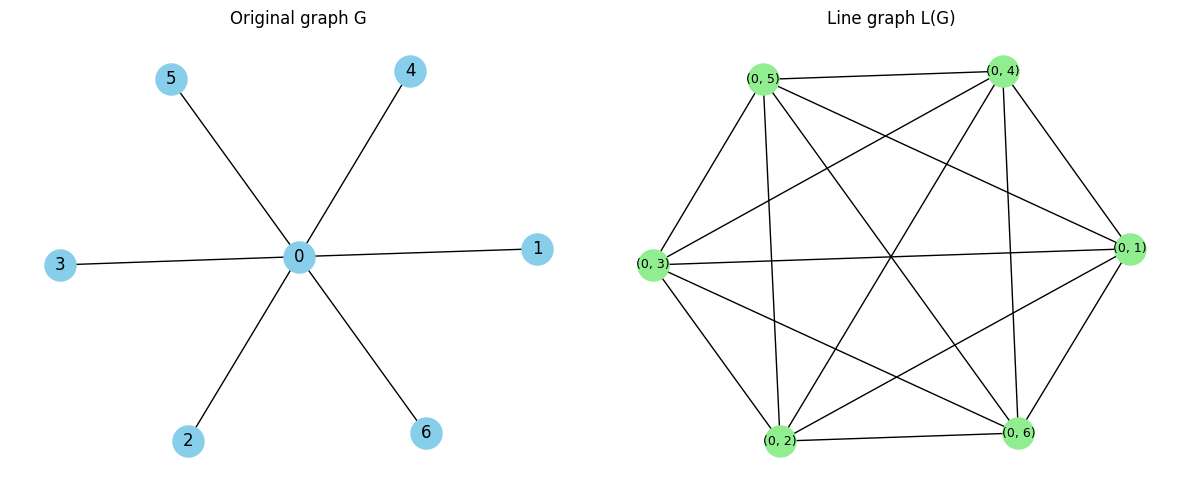

In [10]:
import networkx as nx 
from matplotlib import pyplot as plt

# créer un graphe en étoile : 1 noeud central connecté à 10 feuilles
G = nx.star_graph(6)  # centre = 0, feuilles = 1..10

# line graph
LG = nx.line_graph(G)

# positions : pour G on utilise spring_layout, pour LG on placer chaque noeud au milieu de l'arête correspondante
pos_G = nx.spring_layout(G, seed=42)
pos_LG = {edge: ((pos_G[edge[0]][0] + pos_G[edge[1]][0]) / 2,
                 (pos_G[edge[0]][1] + pos_G[edge[1]][1]) / 2)
          for edge in LG.nodes()}

# tracé côte-à-côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphe original
nx.draw_networkx_nodes(G, pos_G, node_color="skyblue", ax=axes[0], node_size=500)
nx.draw_networkx_edges(G, pos_G, ax=axes[0])
nx.draw_networkx_labels(G, pos_G, ax=axes[0])
axes[0].set_title("Original graph G")
axes[0].axis("off")

# Line graph
nx.draw_networkx_nodes(LG, pos_LG, node_color="lightgreen", ax=axes[1], node_size=500)
nx.draw_networkx_edges(LG, pos_LG, ax=axes[1])
# labels des noeuds de L(G) correspondent aux arêtes de G
nx.draw_networkx_labels(LG, pos_LG, labels={n: str(n) for n in LG.nodes()}, font_size=9, ax=axes[1])
axes[1].set_title("Line graph L(G)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [4]:
import networkx as nx
import random 

# création d’un graphe NetworkX
G = nx.Graph()

NB_MSG   = 100
NB_PARAM = 10

for current_node in range(NB_MSG):

    for i in range(NB_PARAM):
        current_param = random.randint(0,30)
        G.add_edge(f"central_{current_node}", f"param_{current_param}")


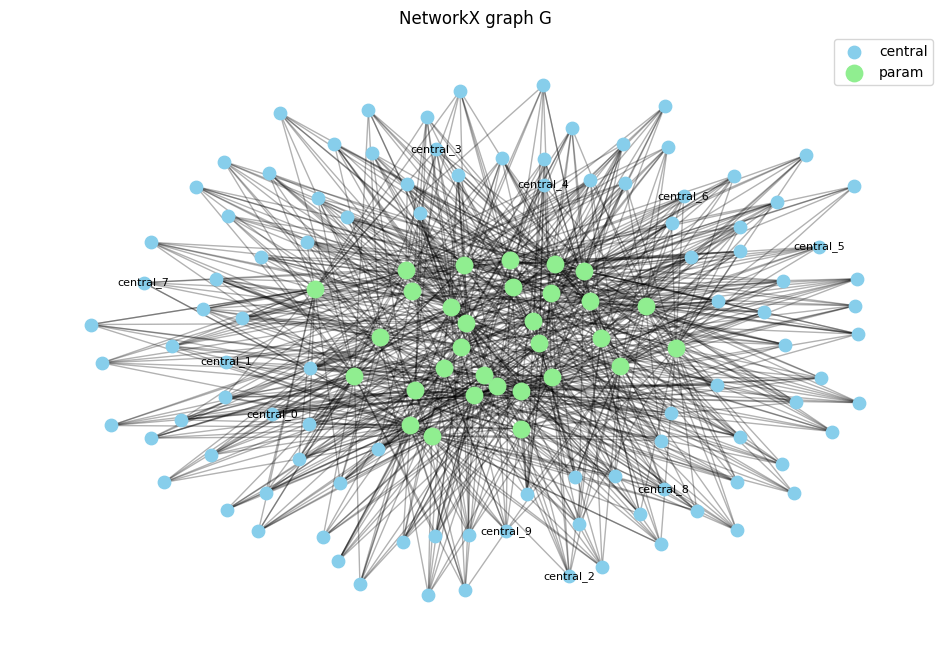

In [8]:
import matplotlib.pyplot as plt

# layout
pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)

# split nodes for coloring
central_nodes = [n for n in G.nodes if str(n).startswith("central_")]
param_nodes = [n for n in G.nodes if str(n).startswith("param_")]

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color="skyblue", node_size=80, label="central")
nx.draw_networkx_nodes(G, pos, nodelist=param_nodes, node_color="lightgreen", node_size=140, label="param")
nx.draw_networkx_edges(G, pos, alpha=0.3)

# show a limited set of labels to avoid clutter (first 10 central nodes)
label_subset = {n: n for n in central_nodes[:10]}
nx.draw_networkx_labels(G, pos, labels=label_subset, font_size=8)

plt.title("NetworkX graph G")
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()

In [9]:
# Convert G to its line graph and display side-by-side with G.
LG = nx.line_graph(G)

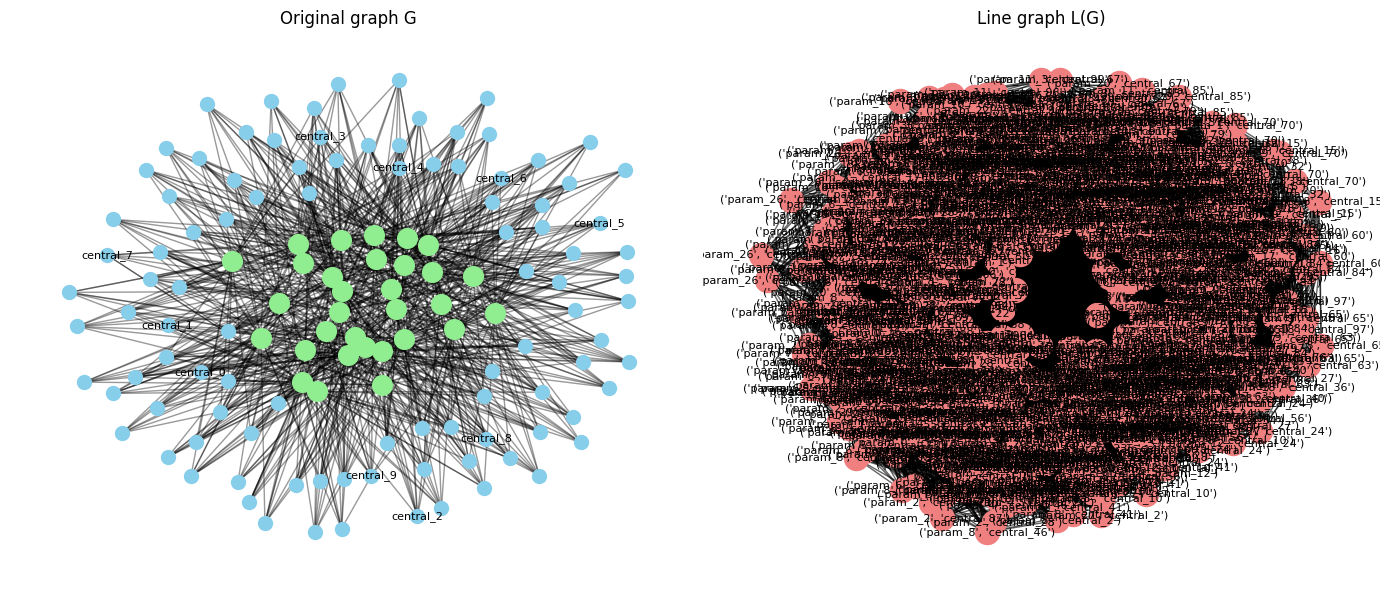

: 

In [ ]:
# Positions for L(G): midpoint of the corresponding edge in G (uses existing `pos`)
pos_LG = {
    edge: ((pos[edge[0]][0] + pos[edge[1]][0]) / 2, (pos[edge[0]][1] + pos[edge[1]][1]) / 2)
    for edge in LG.nodes()
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original graph G
nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color="skyblue", node_size=100, ax=axes[0])
nx.draw_networkx_nodes(G, pos, nodelist=param_nodes, node_color="lightgreen", node_size=200, ax=axes[0])
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=axes[0])
nx.draw_networkx_labels(G, pos, labels=label_subset, font_size=8, ax=axes[0])  # avoid clutter by using label_subset
axes[0].set_title("Original graph G")
axes[0].axis("off")

# Line graph L(G)
nx.draw_networkx_nodes(LG, pos_LG, node_color="lightcoral", node_size=300, ax=axes[1])
nx.draw_networkx_edges(LG, pos_LG, alpha=0.6, ax=axes[1])
nx.draw_networkx_labels(LG, pos_LG, labels={n: str(n) for n in LG.nodes()}, font_size=8, ax=axes[1])
axes[1].set_title("Line graph L(G)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import dhg  # import de la librairie DHG

# conversion en hypergraphe DHG
hg = dhg.Hypergraph.from_graph(G)

print(hg)  # affiche des infos sur l’hypergraphe

In [4]:
import json

with open("../data/pre_process/vocabulary/words/5GCTD.json") as f:
    my_json = json.load(f)
    my_json = list(set(my_json))
    print(len(my_json))

15192


In [5]:
import json

with open("../data/pre_process/vocabulary/words/5GCTD.json") as f:
    my_json = json.load(f)
    my_json = list(set(my_json))
    print(len(my_json))

700


In [1]:
import pickle

loader = pickle.load(open('../data/pre_process/data_loaders/loader_2.pkl', 'rb'))
loader.dataset[0]

Data(edge_index=[2, 2102], label=[1557], node_type=[1557], packet_id=[1557], is_attack=[1557], edge_label=[2102], x=[1557, 701], edge_attr=[2102, 701])

In [4]:
len(loader.dataset[1].x[0])

701